In [1]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
import random # library for random number generation
import requests # library to handle requests
import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML

# # Matplotlib and associated plotting modules
# import matplotlib.cm as cm
# import matplotlib.colors as colors

# # import k-means from clustering stage
# from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library





print('Libraries imported.')

Solving environment: / 
  - anaconda::ca-certificates-2018.03.07-0, anaconda::certifi-2018.11.29-py37_0, anaconda::openssl-1.1.1a-h1de35cc_0
  - anaconda::ca-certificates-2018.03.07-0, anaconda::openssl-1.1.1a-h1de35cc_0, defaults::certifi-2018.11.29-py37_0
  - anaconda::certifi-2018.11.29-py37_0, anaconda::openssl-1.1.1a-h1de35cc_0, defaults::ca-certificates-2018.03.07-0
  - anaconda::openssl-1.1.1a-h1de35cc_0, defaults::ca-certificates-2018.03.07-0, defaults::certifi-2018.11.29-py37_0
  - anaconda::certifi-2018.11.29-py37_0, defaults::ca-certificates-2018.03.07-0, defaults::openssl-1.1.1a-h1de35cc_0
  - defaults::ca-certificates-2018.03.07-0, defaults::certifi-2018.11.29-py37_0, defaults::openssl-1.1.1a-h1de35cc_0
  - anaconda::ca-certificates-2018.03.07-0, anaconda::certifi-2018.11.29-py37_0, defaults::openssl-1.1.1a-h1de35cc_0
  - anaconda::ca-certificates-2018.03.07-0, defaults::certifi-2018.11.29-py37_0, defaults::openssl-1.1.1a-h1de35ccdone

# All requested packages already inst

In [2]:

df1= pd.read_csv('revised-notice-of-property-value-rnopv.csv_shaped.csv')
df1

,BOROCODE,"City, State, Zip",ORIGINAL MARKET VALUE,Borough,Postcode,Latitude,Longitude,NTA
0,1,NEW YORK NY 10002-3504,2298000.0,MANHATTAN,10002.0,40.717979,-73.982666,Lower East Side ...
1,1,FALLS VILLAGE CT 06031-1618,4799000.0,NaN,NaN,NaN,NaN,NaN
2,1,NEW YORK NY 10014-1912,9828000.0,MANHATTAN,10014.0,40.737605,-74.002746,West Village ...
3,1,SUMMIT NJ 07901-2954,14102000.0,NaN,NaN,NaN,NaN,NaN
4,1,NEW YORK NY 10010-1133,7076000.0,MANHATTAN,10010.0,40.743827,-73.987907,Hudson Yards-Chelsea-Flatiron-Union Square ...
5,1,NEW YORK NY 10001-3508,10537000.0,MANHATTAN,10001.0,40.748340,-73.988830,Midtown-Midtown South ...
6,1,NEW YORK NY 10016-7319,16514000.0,MANHATTAN,10016.0,40.743700,-73.981155,Murray Hill-Kips Bay ...
7,1,NEW YORK NY 10023-2138,12609000.0,MANHATTAN,10023.0,40.780408,-73.982076,Lincoln Square ...
8,1,NEW YORK NY 10023,15807000.0,MANHATTAN,10023.0,40.777742,-73.975509,Lincoln Square ...
9,1,NEW YORK NY 10023-6556,279851.0,MANHATTAN,10023.0,40.774428,-73.983540,Lincoln Square ...


In [3]:
df1.shape

(27312, 8)

In [4]:
list(df1)

['BOROCODE',
 'City, State, Zip ',
 'ORIGINAL MARKET VALUE',
 'Borough',
 'Postcode',
 'Latitude',
 'Longitude',
 'NTA']

In [5]:
df1.dropna()

,BOROCODE,"City, State, Zip",ORIGINAL MARKET VALUE,Borough,Postcode,Latitude,Longitude,NTA
0,1,NEW YORK NY 10002-3504,2298000.0,MANHATTAN,10002.0,40.717979,-73.982666,Lower East Side ...
2,1,NEW YORK NY 10014-1912,9828000.0,MANHATTAN,10014.0,40.737605,-74.002746,West Village ...
4,1,NEW YORK NY 10010-1133,7076000.0,MANHATTAN,10010.0,40.743827,-73.987907,Hudson Yards-Chelsea-Flatiron-Union Square ...
5,1,NEW YORK NY 10001-3508,10537000.0,MANHATTAN,10001.0,40.748340,-73.988830,Midtown-Midtown South ...
6,1,NEW YORK NY 10016-7319,16514000.0,MANHATTAN,10016.0,40.743700,-73.981155,Murray Hill-Kips Bay ...
7,1,NEW YORK NY 10023-2138,12609000.0,MANHATTAN,10023.0,40.780408,-73.982076,Lincoln Square ...
8,1,NEW YORK NY 10023,15807000.0,MANHATTAN,10023.0,40.777742,-73.975509,Lincoln Square ...
9,1,NEW YORK NY 10023-6556,279851.0,MANHATTAN,10023.0,40.774428,-73.983540,Lincoln Square ...
10,1,NEW YORK NY 10023-6557,221071.0,MANHATTAN,10023.0,40.774428,-73.983540,Lincoln Square ...
11,1,NEW YORK NY 10023-6559,223519.0,MANHATTAN,10023.0,40.774428,-73.983540,Lincoln Square ...


# Data visualization and pre-processing

In [6]:
df1['Borough'].value_counts()

MANHATTAN    11001
BROOKLYN      5217
QUEENS        3996
STATEN IS     1530
BRONX          680
Name: Borough, dtype: int64

In [7]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.0.2


In [ ]:
df.groupby(['Postcode'])[df1.Borough=='MANHATTAN'].value_counts(normalize=True)

In [63]:
df2=df1[df1['Borough']=='MANHATTAN']

df3 = df2.groupby(['Postcode'])['ORIGINAL MARKET VALUE'].mean()


df3 = pd.DataFrame(df3)

df3.reset_index('Postcode', inplace=True,)
df3

,Postcode,ORIGINAL MARKET VALUE
0,10000.0,1.474300e+07
1,10001.0,4.986051e+06
2,10002.0,1.563640e+07
3,10003.0,9.011658e+06
4,10004.0,1.178019e+07
5,10005.0,1.489319e+06
6,10006.0,2.707507e+06
7,10007.0,1.265924e+06
8,10009.0,4.706729e+05
9,10010.0,2.840840e+06


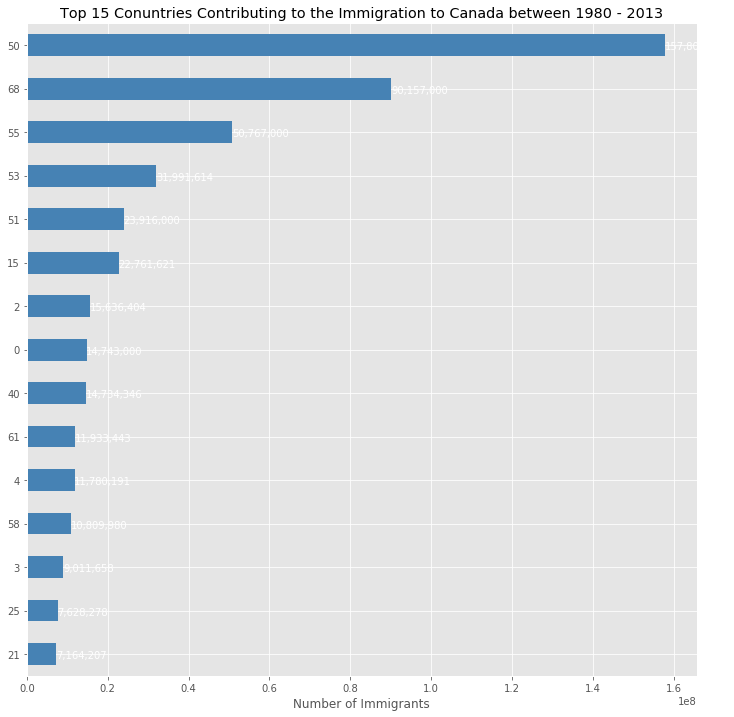

In [65]:



# df3.plot(kind='bar', x='Postcode', y='ORIGINAL MARKET VALUE', figsize=(10, 6), color='darkblue')

# plt.title('Value per Borough')
# plt.xlabel('BOROCODE')
# plt.ylabel('ORIGINAL MARKET VALUE')

# plt.show()
df3.sort_values(by=['ORIGINAL MARKET VALUE'], ascending=True, inplace=True)
 # get top 15 countries
df_top15 = df3['ORIGINAL MARKET VALUE'].tail(15)
df_top15
# df_top15=df3.sort_values(by='ORIGINAL MARKET VALUE', ascending=True, inplace=True)
df_top15.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Number of Immigrants')
plt.title('Top 15 Conuntries Contributing to the Immigration to Canada between 1980 - 2013')
 # annotate value labels to each country
for index, value in enumerate(df_top15): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')

plt.show()

In [48]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [99]:
Feature = df3['ORIGINAL MARKET VALUE']

Feature.head()

37         0.000000
44    179056.333333
46    188602.969697
63    199329.000000
57    252350.000000
Name: ORIGINAL MARKET VALUE, dtype: float64

In [100]:
X = Feature
X[0:71]

37    0.000000e+00
44    1.790563e+05
46    1.886030e+05
63    1.993290e+05
57    2.523500e+05
67    3.039240e+05
47    3.449390e+05
39    3.470000e+05
70    3.692020e+05
69    3.983737e+05
42    4.138142e+05
8     4.706729e+05
64    4.869922e+05
66    4.907350e+05
31    5.038919e+05
62    5.640250e+05
60    5.866395e+05
33    6.642464e+05
48    6.932511e+05
12    7.487998e+05
27    8.012104e+05
29    8.741288e+05
65    9.080000e+05
22    1.045744e+06
43    1.104817e+06
23    1.137659e+06
7     1.265924e+06
35    1.307000e+06
38    1.345587e+06
24    1.410433e+06
          ...     
30    3.114667e+06
56    3.199068e+06
36    3.248558e+06
11    3.325351e+06
45    3.417059e+06
32    4.031649e+06
20    4.412060e+06
1     4.986051e+06
16    5.232290e+06
14    5.484799e+06
18    5.541957e+06
17    5.750899e+06
41    5.953333e+06
13    6.850288e+06
59    6.976333e+06
21    7.164207e+06
25    7.628279e+06
3     9.011658e+06
58    1.080998e+07
4     1.178019e+07
61    1.193344e+07
40    1.4734

In [101]:
y = df3['Postcode'].values
y[0:71]

array([10039., 10103., 10107., 10173., 10162., 10280., 10112., 10041.,
       10463., 10282., 10069., 10009., 10174., 10279., 10033., 10171.,
       10169., 10035., 10118., 10013., 10029., 10031., 10271., 10024.,
       10075., 10025., 10007., 10037., 10040., 10026., 10128., 10005.,
       10011., 10119., 10021., 10028., 10152., 10006., 10036., 10010.,
       10030., 10032., 10155., 10038., 10012., 10106., 10034., 10022.,
       10001., 10018., 10016., 10020., 10019., 10065., 10014., 10168.,
       10023., 10027., 10003., 10165., 10004., 10170., 10044., 10000.,
       10002., 10017., 10123., 10151., 10154., 10281., 10120.])

In [102]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:71]

ValueError: Expected 2D array, got 1D array instead:
array=[0.00000000e+00 1.79056333e+05 1.88602970e+05 1.99329000e+05
 2.52350000e+05 3.03923951e+05 3.44939000e+05 3.47000000e+05
 3.69202000e+05 3.98373737e+05 4.13814222e+05 4.70672948e+05
 4.86992200e+05 4.90735000e+05 5.03891900e+05 5.64025000e+05
 5.86639500e+05 6.64246387e+05 6.93251100e+05 7.48799767e+05
 8.01210378e+05 8.74128833e+05 9.08000000e+05 1.04574450e+06
 1.10481681e+06 1.13765861e+06 1.26592413e+06 1.30700000e+06
 1.34558658e+06 1.41043340e+06 1.47086773e+06 1.48931933e+06
 1.61081741e+06 1.67180625e+06 2.40291830e+06 2.40573743e+06
 2.43325267e+06 2.70750743e+06 2.82645243e+06 2.84084036e+06
 2.93761171e+06 3.11466667e+06 3.19906800e+06 3.24855792e+06
 3.32535132e+06 3.41705917e+06 4.03164924e+06 4.41206034e+06
 4.98605104e+06 5.23228987e+06 5.48479934e+06 5.54195700e+06
 5.75089927e+06 5.95333307e+06 6.85028846e+06 6.97633333e+06
 7.16420734e+06 7.62827895e+06 9.01165813e+06 1.08099805e+07
 1.17801919e+07 1.19334430e+07 1.47343468e+07 1.47430000e+07
 1.56364042e+07 2.27616212e+07 2.39160000e+07 3.19916140e+07
 5.07670000e+07 9.01570000e+07 1.57806000e+08].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [103]:
# Split X into Train and Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (56,) (56,)
Test set: (15,) (15,)


In [104]:
#Classification with KNN - Import library
from sklearn.neighbors import KNeighborsClassifier

In [105]:
#Train model
#Try first with k=4 
k = 4
neigh4 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh4

ValueError: Expected 2D array, got 1D array instead:
array=[4.13814222e+05 4.90735000e+05 3.47000000e+05 3.44939000e+05
 1.10481681e+06 4.70672948e+05 1.17801919e+07 9.08000000e+05
 6.93251100e+05 7.16420734e+06 4.86992200e+05 2.84084036e+06
 1.30700000e+06 1.08099805e+07 1.13765861e+06 4.98605104e+06
 5.86639500e+05 6.64246387e+05 1.48931933e+06 2.40291830e+06
 5.64025000e+05 6.85028846e+06 1.34558658e+06 3.11466667e+06
 1.67180625e+06 1.19334430e+07 1.61081741e+06 1.04574450e+06
 4.41206034e+06 3.69202000e+05 1.47086773e+06 1.57806000e+08
 1.88602970e+05 5.23228987e+06 1.47343468e+07 2.39160000e+07
 1.47430000e+07 8.74128833e+05 0.00000000e+00 1.99329000e+05
 5.75089927e+06 3.19906800e+06 2.82645243e+06 3.32535132e+06
 3.19916140e+07 2.43325267e+06 2.93761171e+06 7.62827895e+06
 1.56364042e+07 9.01570000e+07 9.01165813e+06 3.98373737e+05
 5.48479934e+06 1.79056333e+05 6.97633333e+06 4.03164924e+06].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [106]:
#Predict the test set
#This is still with k=4
yhat = neigh4.predict(X_test)
yhat[0:10]

ValueError: Expected 2D array, got 1D array instead:
array=[ 1410433.4        50767000.         22761621.24333333   801210.37795276
  1265924.13104326   252350.           748799.76679842  2405737.43272727
  5953333.07168459  5541957.           303923.95102041   503891.9
  3248557.92        2707507.42857143  3417059.16666667].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [88]:
#Accuracy evaluation using jaccard
from sklearn import metrics
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Test set Accuracy:  0.0


In [89]:
#Now, let's do it again with k=6
k = 6
neigh6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
#neigh6
#Predict the test set
yhat6 = neigh6.predict(X_test)
#yhat[0:10]
#Accuracy evaluation using jaccard
#from sklearn import metrics
print("Test set Accuracy with k=6: ", metrics.accuracy_score(y_test, yhat6))

Test set Accuracy with k=6:  0.0


Accuracy with k= 1  : 0.0
Accuracy with k= 2  : 0.0
Accuracy with k= 3  : 0.0
Accuracy with k= 4  : 0.0
Accuracy with k= 5  : 0.0
Accuracy with k= 6  : 0.0
Accuracy with k= 7  : 0.0
Accuracy with k= 8  : 0.0
Accuracy with k= 9  : 0.0
Accuracy with k= 10  : 0.0
Accuracy with k= 11  : 0.0
Accuracy with k= 12  : 0.0
Accuracy with k= 13  : 0.0
Accuracy with k= 14  : 0.0
Accuracy with k= 15  : 0.0


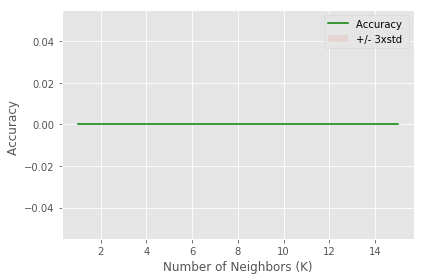

The best accuracy was with 0.0 with k= 1


In [90]:
#Let's calculate the accuracy of KNN for different values of k to choose the best k
Ks = 16
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks): 
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    #Eval
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    print("Accuracy with k=", n, " :", mean_acc[n-1])

mean_acc
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

In [ ]:
# so the model to be used is the following:
#neigh7
k = 7
neigh7 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh7

In [91]:
#Classification with decision tree
from sklearn.tree import DecisionTreeClassifier

boroughDecisionTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
boroughDecisionTree # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [92]:
boroughDecisionTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [93]:
#Preciction on the testing dataset
#yhat
boroughPredTree = boroughDecisionTree.predict(X_test)
boroughPredTree

array([10005., 10151., 10004., 10031., 10009., 10112., 10009., 10030.,
       10040., 10018., 10112., 10031., 10018., 10005., 10119.])

In [95]:
#Evaluation of the model
#Here this is just an eval 
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, boroughPredTree))

DecisionTrees's Accuracy:  0.0


In [96]:
#Visualization of the tree
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

Solving environment: - 
  - anaconda::ca-certificates-2018.03.07-0, anaconda::certifi-2018.11.29-py37_0, anaconda::openssl-1.1.1a-h1de35cc_0
  - anaconda::ca-certificates-2018.03.07-0, anaconda::openssl-1.1.1a-h1de35cc_0, defaults::certifi-2018.11.29-py37_0
  - anaconda::certifi-2018.11.29-py37_0, anaconda::openssl-1.1.1a-h1de35cc_0, defaults::ca-certificates-2018.03.07-0
  - anaconda::openssl-1.1.1a-h1de35cc_0, defaults::ca-certificates-2018.03.07-0, defaults::certifi-2018.11.29-py37_0
  - anaconda::certifi-2018.11.29-py37_0, defaults::ca-certificates-2018.03.07-0, defaults::openssl-1.1.1a-h1de35cc_0
  - defaults::ca-certificates-2018.03.07-0, defaults::certifi-2018.11.29-py37_0, defaults::openssl-1.1.1a-h1de35cc_0
  - anaconda::ca-certificates-2018.03.07-0, anaconda::certifi-2018.11.29-py37_0, defaults::openssl-1.1.1a-h1de35cc_0
  - anaconda::ca-certificates-2018.03.07-0, defaults::certifi-2018.11.29-py37_0, defaults::openssl-1.1.1a-h1de35ccdone

## Package Plan ##

  environment loc

In [97]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)
LR

/Users/konstantinosbousios/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [107]:

import geopy
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

address = 'New York, NY'

def do_geocode(address):
    geopy = Nominatim(user_agent="foursquare_agent")

    try:
        return geopy.geocode(address)
    except GeocoderTimedOut:
        return do_geocode(address)

location = do_geocode(address)
# newyork_latitude = location.latitude
# newyork_longitude = location.longitude
# location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of New York are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of New York are 40.7308619, -73.9871558.


In [108]:
CLIENT_ID = 'EVB2U5OA4QXIYGXVUK4JCLCJLAK0RKBJRWGWAUYIMBE2ZJ0N' # your Foursquare ID
CLIENT_SECRET = 'XNAFJHATEZJLBS0LHO2OP2TDPMYIRG2AYE4BTKOLTQJVGI05' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 1000
radius = 3000

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)
    

Your credentails:
CLIENT_ID: EVB2U5OA4QXIYGXVUK4JCLCJLAK0RKBJRWGWAUYIMBE2ZJ0N
CLIENT_SECRET:XNAFJHATEZJLBS0LHO2OP2TDPMYIRG2AYE4BTKOLTQJVGI05


In [109]:
search_query = 'Food'
radius = 3000
print(search_query + ' .... OK!')

Food .... OK!


In [110]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=EVB2U5OA4QXIYGXVUK4JCLCJLAK0RKBJRWGWAUYIMBE2ZJ0N&client_secret=XNAFJHATEZJLBS0LHO2OP2TDPMYIRG2AYE4BTKOLTQJVGI05&ll=40.7308619,-73.9871558&v=20180604&query=Food&radius=3000&limit=1000'

In [111]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5c72d1204c1f676352ebf084'},
 'response': {'venues': [{'id': '4b2f244df964a520bae924e3',
    'name': 'Key Food',
    'location': {'address': '52 Avenue A',
     'crossStreet': 'at E 4th St',
     'lat': 40.72408907861925,
     'lng': -73.98485674199942,
     'labeledLatLngs': [{'label': 'display',
       'lat': 40.72408907861925,
       'lng': -73.98485674199942}],
     'distance': 778,
     'postalCode': '10009',
     'cc': 'US',
     'city': 'New York',
     'state': 'NY',
     'country': 'United States',
     'formattedAddress': ['52 Avenue A (at E 4th St)',
      'New York, NY 10009',
      'United States']},
    'categories': [{'id': '52f2ab2ebcbc57f1066b8b46',
      'name': 'Supermarket',
      'pluralName': 'Supermarkets',
      'shortName': 'Supermarket',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/food_grocery_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1551028512',
    'hasPerk': Fal

In [112]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,delivery.id,delivery.provider.icon.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.name,delivery.url,hasPerk,id,location.address,...,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '52f2ab2ebcbc57f1066b8b46', 'name': 'S...",NaN,NaN,NaN,NaN,NaN,NaN,False,4b2f244df964a520bae924e3,52 Avenue A,...,"[52 Avenue A (at E 4th St), New York, NY 10009...","[{'label': 'display', 'lat': 40.72408907861925...",40.724089,-73.984857,NaN,10009,NY,Key Food,v-1551028512,NaN
1,"[{'id': '4bf58dd8d48988d120951735', 'name': 'F...",NaN,NaN,NaN,NaN,NaN,NaN,False,4d14ee31b15cb1f7f9a3a421,11 W 32nd St,...,"[11 W 32nd St (btwn Broadway & 5th Ave), New Y...","[{'label': 'display', 'lat': 40.74759182420299...",40.747592,-73.986286,NaN,10001,NY,Food Gallery 32,v-1551028512,63139090
2,"[{'id': '4bf58dd8d48988d118951735', 'name': 'G...",NaN,NaN,NaN,NaN,NaN,NaN,False,4b5b6ddcf964a5205ffd28e3,79 Elizabeth St,...,"[79 Elizabeth St (btwn Grand & Hester St), New...","[{'label': 'display', 'lat': 40.71819429178453...",40.718194,-73.996838,NaN,10013,NY,Deluxe Food Market 德昌食品市場,v-1551028512,NaN
3,"[{'id': '4bf58dd8d48988d14e941735', 'name': 'A...",NaN,NaN,NaN,NaN,NaN,NaN,False,543daa47498ead5eaf67b8a6,275 Mulberry St,...,"[275 Mulberry St (at E Houston St), New York, ...","[{'label': 'display', 'lat': 40.7242743, 'lng'...",40.724274,-73.995402,NaN,10012,NY,Chefs Club by Food & Wine NY,v-1551028512,103924419
4,"[{'id': '4bf58dd8d48988d1cb941735', 'name': 'F...",NaN,NaN,NaN,NaN,NaN,NaN,False,4d7d7d978f89224b46f0b726,Irving Pl & 14 St,...,[Irving Pl & 14 St (In Front of P.C. Richard &...,"[{'label': 'display', 'lat': 40.7340005160263,...",40.734001,-73.988992,NaN,10003,NY,Ruma & Shanta Halal Food,v-1551028512,NaN


In [113]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Key Food,Supermarket,52 Avenue A,US,New York,United States,at E 4th St,778,"[52 Avenue A (at E 4th St), New York, NY 10009...","[{'label': 'display', 'lat': 40.72408907861925...",40.724089,-73.984857,NaN,10009,NY,4b2f244df964a520bae924e3
1,Food Gallery 32,Food Court,11 W 32nd St,US,New York,United States,btwn Broadway & 5th Ave,1863,"[11 W 32nd St (btwn Broadway & 5th Ave), New Y...","[{'label': 'display', 'lat': 40.74759182420299...",40.747592,-73.986286,NaN,10001,NY,4d14ee31b15cb1f7f9a3a421
2,Deluxe Food Market 德昌食品市場,Grocery Store,79 Elizabeth St,US,New York,United States,btwn Grand & Hester St,1629,"[79 Elizabeth St (btwn Grand & Hester St), New...","[{'label': 'display', 'lat': 40.71819429178453...",40.718194,-73.996838,NaN,10013,NY,4b5b6ddcf964a5205ffd28e3
3,Chefs Club by Food & Wine NY,American Restaurant,275 Mulberry St,US,New York,United States,at E Houston St,1010,"[275 Mulberry St (at E Houston St), New York, ...","[{'label': 'display', 'lat': 40.7242743, 'lng'...",40.724274,-73.995402,NaN,10012,NY,543daa47498ead5eaf67b8a6
4,Ruma & Shanta Halal Food,Food Truck,Irving Pl & 14 St,US,New York,United States,In Front of P.C. Richard & Son,382,[Irving Pl & 14 St (In Front of P.C. Richard &...,"[{'label': 'display', 'lat': 40.7340005160263,...",40.734001,-73.988992,NaN,10003,NY,4d7d7d978f89224b46f0b726
5,Mission Chinese Food,Chinese Restaurant,171 E Broadway,US,New York,United States,btwn Rutgers & Jefferson St,1880,"[171 E Broadway (btwn Rutgers & Jefferson St),...","[{'label': 'display', 'lat': 40.71408309640304...",40.714083,-73.989789,Two Bridges,10002,NY,4fa89bb2e4b0bad89524b84a
6,Whole Foods Market,Grocery Store,95 East Houston St,US,New York,United States,btwn Bowery & Chrystie St,866,[95 East Houston St (btwn Bowery & Chrystie St...,"[{'label': 'display', 'lat': 40.72379291318329...",40.723793,-73.991461,NaN,10002,NY,460d4b1ef964a52004451fe3
7,NYU Palladium Food Court,College Cafeteria,140 E 14th St,US,New York,United States,btw 3rd & 4th Ave,299,"[140 E 14th St (btw 3rd & 4th Ave), New York, ...","[{'label': 'display', 'lat': 40.73337280058862...",40.733373,-73.988415,NaN,10003,NY,4b2d5b5af964a520f8d424e3
8,Food Emporium,Supermarket,10 Union Sq E,US,New York,United States,E 14th St,436,"[10 Union Sq E (E 14th St), New York, NY 10003...","[{'label': 'display', 'lat': 40.73434079522086...",40.734341,-73.989531,NaN,10003,NY,45b3d761f964a520b1411fe3
9,Food Emporium,Supermarket,810 8th Ave,US,New York,United States,at W 49th St,3445,"[810 8th Ave (at W 49th St), New York, NY 1001...","[{'label': 'display', 'lat': 40.76181080975905...",40.761811,-73.986411,Theater District,10019,NY,4a9bc3d7f964a5202e3520e3


In [114]:
dataframe_filtered.name

0                                              Key Food
1                                       Food Gallery 32
2                             Deluxe Food Market 德昌食品市場
3                          Chefs Club by Food & Wine NY
4                              Ruma & Shanta Halal Food
5                                  Mission Chinese Food
6                                    Whole Foods Market
7                              NYU Palladium Food Court
8                                         Food Emporium
9                                         Food Emporium
10                                   Whole Foods Market
11                    Wah Fung Number 1 Fast Food 華豐快飯店
12                                  Rafiqi's Halal Food
13                                 Essen Fast Slow Food
14                                             Key Food
15                                    Habibi Halal Food
16                                        Food Emporium
17                                             K

In [115]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Conrad Hotel
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Conrad Hotel',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

In [116]:
venue_id = '4b2f244df964a520bae924e3' 
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
url

'https://api.foursquare.com/v2/venues/4b2f244df964a520bae924e3?client_id=EVB2U5OA4QXIYGXVUK4JCLCJLAK0RKBJRWGWAUYIMBE2ZJ0N&client_secret=XNAFJHATEZJLBS0LHO2OP2TDPMYIRG2AYE4BTKOLTQJVGI05&v=20180604'

In [117]:
result = requests.get(url).json()
print(result['response']['venue'].keys())
result['response']['venue']

dict_keys(['id', 'name', 'contact', 'location', 'canonicalUrl', 'categories', 'verified', 'stats', 'url', 'likes', 'dislike', 'ok', 'rating', 'ratingColor', 'ratingSignals', 'allowMenuUrlEdit', 'beenHere', 'specials', 'photos', 'reasons', 'description', 'storeId', 'page', 'hereNow', 'createdAt', 'tips', 'shortUrl', 'timeZone', 'listed', 'hours', 'popular', 'pageUpdates', 'inbox', 'attributes', 'bestPhoto', 'colors'])


{'id': '4b2f244df964a520bae924e3',
 'name': 'Key Food',
 'contact': {'phone': '2124779063',
  'formattedPhone': '(212) 477-9063',
  'twitter': 'keyfood',
  'facebook': '126122102671',
  'facebookUsername': 'keyfood',
  'facebookName': 'Key Food'},
 'location': {'address': '52 Avenue A',
  'crossStreet': 'at E 4th St',
  'lat': 40.72408907861925,
  'lng': -73.98485674199942,
  'labeledLatLngs': [{'label': 'display',
    'lat': 40.72408907861925,
    'lng': -73.98485674199942}],
  'postalCode': '10009',
  'cc': 'US',
  'city': 'New York',
  'state': 'NY',
  'country': 'United States',
  'formattedAddress': ['52 Avenue A (at E 4th St)',
   'New York, NY 10009',
   'United States']},
 'canonicalUrl': 'https://foursquare.com/v/key-food/4b2f244df964a520bae924e3',
 'categories': [{'id': '52f2ab2ebcbc57f1066b8b46',
   'name': 'Supermarket',
   'pluralName': 'Supermarkets',
   'shortName': 'Supermarket',
   'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/food_grocery_',
    'su

In [118]:
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

5.9


In [119]:
venue_id = '56a8ffbb498e6d9f0e88052d' # ID of Conca Cucina Italian Restaurant
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

7.6


In [120]:
result['response']['venue']['tips']['count']

31

In [121]:
## Ecco Tips
limit = 100 # set limit to be greater than or equal to the total number of tips
url = 'https://api.foursquare.com/v2/venues/{}/tips?client_id={}&client_secret={}&v={}&limit={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION, limit)

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5c72d17fdb04f505a43f4df6'},
 'response': {'tips': {'count': 31,
   'items': [{'id': '57224d73498e9802e5ca36fa',
     'createdAt': 1461865843,
     'text': "If you're not sure what you want for lunch, this is either the best or worst place in the world. So many options (but I recommend the sandwiches).",
     'type': 'user',
     'canonicalUrl': 'https://foursquare.com/item/57224d73498e9802e5ca36fa',
     'photo': {'id': '57224d73498e9802e5ca36f9',
      'createdAt': 1461865843,
      'source': {'name': 'Swarm for iOS', 'url': 'https://www.swarmapp.com'},
      'prefix': 'https://fastly.4sqi.net/img/general/',
      'suffix': '/2341398_wL0Y68G6YPC88nJEZlhtPMAUIoE3RVLsjvCC2JWhrv4.jpg',
      'width': 1440,
      'height': 1440,
      'visibility': 'public'},
     'photourl': 'https://fastly.4sqi.net/img/general/original/2341398_wL0Y68G6YPC88nJEZlhtPMAUIoE3RVLsjvCC2JWhrv4.jpg',
     'lang': 'en',
     'likes': {'count': 0, 'groups': []},
     'logView'

In [122]:
tips = results['response']['tips']['items']

tip = results['response']['tips']['items'][0]
tip.keys()

dict_keys(['id', 'createdAt', 'text', 'type', 'canonicalUrl', 'photo', 'photourl', 'lang', 'likes', 'logView', 'agreeCount', 'disagreeCount', 'todo', 'user', 'authorInteractionType'])

In [123]:
pd.set_option('display.max_colwidth', -1)

tips_df = json_normalize(tips) # json normalize tips

# columns to keep
filtered_columns = ['text', 'agreeCount', 'disagreeCount', 'id', 'user.firstName', 'user.lastName', 'user.gender', 'user.id']
tips_filtered = tips_df.loc[:, filtered_columns]

# display tips
tips_filtered

,text,agreeCount,disagreeCount,id,user.firstName,user.lastName,user.gender,user.id
0,"If you're not sure what you want for lunch, this is either the best or worst place in the world. So many options (but I recommend the sandwiches).",4,0,57224d73498e9802e5ca36fa,Cole,Kennedy,male,2341398


In [124]:
user_id = '2341398' # user ID with most agree counts and complete profile

url = 'https://api.foursquare.com/v2/users/{}?client_id={}&client_secret={}&v={}'.format(user_id, CLIENT_ID, CLIENT_SECRET, VERSION) # define URL

# send GET request
results = requests.get(url).json()
user_data = results['response']['user']

# display features associated with user
user_data.keys()

dict_keys(['id', 'firstName', 'lastName', 'gender', 'canonicalUrl', 'photo', 'friends', 'tips', 'homeCity', 'bio', 'contact', 'superuser', 'photos', 'type', 'mayorships', 'checkins', 'lists', 'campusAmbassador', 'lenses'])

In [125]:
print('First Name: ' + user_data['firstName'])
print('Last Name: ' + user_data['lastName'])
print('Home City: ' + user_data['homeCity'])

First Name: Cole
Last Name: Kennedy
Home City: New York, NY


In [126]:
user_data['tips']

{'count': 1184}

In [127]:
# define tips URL
url = 'https://api.foursquare.com/v2/users/{}/tips?client_id={}&client_secret={}&v={}&limit={}'.format(user_id, CLIENT_ID, CLIENT_SECRET, VERSION, limit)

# send GET request and get user's tips
results = requests.get(url).json()
tips = results['response']['tips']['items']

# format column width
pd.set_option('display.max_colwidth', -1)

tips_df = json_normalize(tips)

# filter columns
filtered_columns = ['text', 'agreeCount', 'disagreeCount', 'id']
tips_filtered = tips_df.loc[:, filtered_columns]

# display user's tips
tips_filtered

,text,agreeCount,disagreeCount,id
0,"Home to a frequently refreshed stock of rare vinyl records. You can find some absolute gems, but you’ll also pay a pretty penny.",0,0,5c6afb6c5bc27d0026a08245
1,Decent lunch spot; I like the turkey melt. Check the LevelUp app for discounts; you can usually get a few bucks off for your first visit.,0,0,5c66f1c9c5b11c002bb31493
2,"Awesome, chewy udon noodles with some interesting soups: I liked the Niku Udon with short rib and tripe. The wait is worth it; just go somewhere on the block for a drink.",0,0,5c61e839da7080002ca2a3ee
3,"Really not a great deli, but I guess it’s fine if you don’t want to walk another block or two.",0,0,5c5758f98194fc00396b3436
4,"Extremely funky and good. The waterbed is some desirable real estate, but even if you can’t hang on it, the rest of the place is just as good.",1,0,5c571b8a98fbfc002c13405d
5,"Incredible selection of craft beer, and also everything else. That said, it makes Whole Foods feel like a bargain.",0,0,5c5484edc47cf9003954c630
6,"It's always crowded with older businessmen who are trying to, like, become cool through association with craft cocktails but don't want to go outside of their safe zone.",0,0,5c3cab1e6336be002b484cac
7,"I can't appreciate things from Philadelphia since they beat the Patriots in the Super Bowl, but this place doesn't entirely suck.",0,0,5c3caae05455b2002c1043ba
8,"It's fancy and feels sorta like the Old King Cole bar in the St. Regis, right down to the painting behind the bar, but with a more millennial bent.",1,0,5c3caac292e7a9002c243d19
9,"Hey, look, another elevated fast casual spot serving vegetable-forward bowls without any discernible culinary direction and a LevelUp scanner!",0,0,5c34f8df2bf29b002ddba723


In [128]:
user_friends = json_normalize(user_data['friends']['groups'][0]['items'])
user_friends

,bio,firstName,gender,homeCity,id,lastName,lists.groups,photo.prefix,photo.suffix,superuser,tips.count
0,,Ken,male,"New York, NY",50002402,Little,"[{'type': 'created', 'count': 2, 'items': []}]",https://fastly.4sqi.net/img/user/,/UZGWKX5Z5T1JMJHA.jpg,NaN,3
1,,Cole,male,"Spring Grove, IL",476656250,Halligan,"[{'type': 'created', 'count': 4, 'items': []}]",https://fastly.4sqi.net/img/user/,/476656250_YyBSe2fQ_e8IalvHD6MN7XW41r-zwVoJwu6sMc_1hXnrrmg9vYRQHifSSWuYDO_mbL6_E3Fys.jpg,NaN,7
2,,Patrick,male,"New York, New York",479544756,Derocher,"[{'type': 'created', 'count': 2, 'items': []}]",https://fastly.4sqi.net/img/user/,/479544756_plpZ6x89_1P6IZ8ulZa0yjcOML89a08wPEjDqtBbRiFDi3neP1U6Ept7fD4up1TR_6C105JbH.jpg,NaN,6
3,,Will,male,"New York, NY",199021707,Huguenin,"[{'type': 'created', 'count': 2, 'items': []}]",https://fastly.4sqi.net/img/user/,/199021707-BDTPYGGQKSIJ4JT1.jpg,NaN,25
4,,Aydan,female,"Shoreline, Washington",1237451,NaN,"[{'type': 'created', 'count': 6, 'items': []}]",https://fastly.4sqi.net/img/user/,/1237451_1-L9fH7f_iyETgjjBzAV4Nz8gJOKbuHzQhiwRi59EDXueVKVpIRt9CWXK2TM0i5ByyExKx3Si.jpg,NaN,0
5,👀 for the best old fashioned,Zach,male,🗽,22498383,Kahn,"[{'type': 'created', 'count': 14, 'items': []}]",https://fastly.4sqi.net/img/user/,/22498383_v4rCGBc3_JE8Vzp1EBsrzqVaBR9iMuBTSLEgMYNF-hjt-x3VfSofWryMQAYJfTn8DfoPdWWgf.jpg,1.0,0
6,,Kenneth,male,Raleigh,5425134,Smith,"[{'type': 'created', 'count': 2, 'items': []}]",https://fastly.4sqi.net/img/user/,/5425134-31R1RSKNSIMSYF3P.jpg,NaN,5
7,,Krista,female,"New York, New York",184150206,Karjalainen,"[{'type': 'created', 'count': 9, 'items': []}]",https://fastly.4sqi.net/img/user/,/184150206-1HLUKRASE14LKHDD.jpg,NaN,1
8,,Amortya,male,NY,12397098,Ray,"[{'type': 'created', 'count': 4, 'items': []}]",https://fastly.4sqi.net/img/user/,/ZZYALZYL3SVB0HPO.jpg,NaN,14
9,,Aaron,male,"New York, NY",118197387,Bunge,"[{'type': 'created', 'count': 2, 'items': []}]",https://fastly.4sqi.net/img/user/,/118197387-EKREVUTZVNR4H2YI.jpg,NaN,3


In [129]:
user_data

{'id': '2341398',
 'firstName': 'Cole',
 'lastName': 'Kennedy',
 'gender': 'male',
 'canonicalUrl': 'https://foursquare.com/cdohertyk',
 'photo': {'prefix': 'https://fastly.4sqi.net/img/user/',
  'suffix': '/2341398_eR0MyTkV_ol4CbqCf3CVbPqPagLc1YDByuZrQH4KrV2R72t9XDr3uN5ZRcC5nDrj_kZbc_KGe.jpg'},
 'friends': {'count': 144,
  'groups': [{'type': 'others',
    'name': 'Other friends',
    'count': 144,
    'items': [{'id': '50002402',
      'firstName': 'Ken',
      'lastName': 'Little',
      'gender': 'male',
      'photo': {'prefix': 'https://fastly.4sqi.net/img/user/',
       'suffix': '/UZGWKX5Z5T1JMJHA.jpg'},
      'tips': {'count': 3},
      'lists': {'groups': [{'type': 'created', 'count': 2, 'items': []}]},
      'homeCity': 'New York, NY',
      'bio': '',
      'contact': {}},
     {'id': '476656250',
      'firstName': 'Cole',
      'lastName': 'Halligan',
      'gender': 'male',
      'photo': {'prefix': 'https://fastly.4sqi.net/img/user/',
       'suffix': '/476656250_YyBSe2

In [130]:
# 1. grab prefix of photo
# 2. grab suffix of photo
# 3. concatenate them using the image size  
Image(url='https://igx.4sqi.net/img/user/300x300/484542633_mK2Yum7T_7Tn9fWpndidJsmw2Hof_6T5vJBKCHPLMK5OL-U5ZiJGj51iwBstcpDLYa3Zvhvis.jpg')

In [131]:
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?client_id=EVB2U5OA4QXIYGXVUK4JCLCJLAK0RKBJRWGWAUYIMBE2ZJ0N&client_secret=XNAFJHATEZJLBS0LHO2OP2TDPMYIRG2AYE4BTKOLTQJVGI05&ll=40.7308619,-73.9871558&v=20180604&radius=3000&limit=1000'

In [132]:
import requests

In [133]:
results = requests.get(url).json()
'There are {} around Ecco restaurant.'.format(len(results['response']['groups'][0]['items']))

'There are 100 around Ecco restaurant.'

In [134]:
items = results['response']['groups'][0]['items']
items[0]

{'reasons': {'count': 0,
  'items': [{'summary': 'This spot is popular',
    'type': 'general',
    'reasonName': 'globalInteractionReason'}]},
 'venue': {'id': '3fd66200f964a5203de41ee3',
  'name': 'Sake Bar Decibel',
  'location': {'address': '240 E 9th St',
   'crossStreet': 'btwn 2nd & 3rd Ave.',
   'lat': 40.72941823593811,
   'lng': -73.98776923605922,
   'labeledLatLngs': [{'label': 'display',
     'lat': 40.72941823593811,
     'lng': -73.98776923605922}],
   'distance': 168,
   'postalCode': '10003',
   'cc': 'US',
   'city': 'New York',
   'state': 'NY',
   'country': 'United States',
   'formattedAddress': ['240 E 9th St (btwn 2nd & 3rd Ave.)',
    'New York, NY 10003',
    'United States']},
  'categories': [{'id': '4bf58dd8d48988d11c941735',
    'name': 'Sake Bar',
    'pluralName': 'Sake Bars',
    'shortName': 'Sake Bar',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/sake_',
     'suffix': '.png'},
    'primary': True}],
  'photos': {'count': 0

In [135]:
dataframe = json_normalize(items) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# filter the category for each row
dataframe_filtered['venue.categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean columns
dataframe_filtered.columns = [col.split('.')[-1] for col in dataframe_filtered.columns]

dataframe_filtered.head(1000)

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Sake Bar Decibel,Sake Bar,240 E 9th St,US,New York,United States,btwn 2nd & 3rd Ave.,168,"[240 E 9th St (btwn 2nd & 3rd Ave.), New York, NY 10003, United States]","[{'label': 'display', 'lat': 40.72941823593811, 'lng': -73.98776923605922}]",40.729418,-73.987769,NaN,10003,NY,3fd66200f964a5203de41ee3
1,Momofuku Ssäm Bar,Asian Restaurant,207 2nd Ave,US,New York,United States,at E 13th St,163,"[207 2nd Ave (at E 13th St), New York, NY 10003, United States]","[{'label': 'display', 'lat': 40.73171120851343, 'lng': -73.98557086127735}]",40.731711,-73.985571,NaN,10003,NY,4acca438f964a5201dc920e3
2,Angel’s Share,Speakeasy,8 Stuyvesant St,US,New York,United States,at E 9th St & 3rd Ave,223,"[8 Stuyvesant St (at E 9th St & 3rd Ave), New York, NY 10003, United States]","[{'label': 'display', 'lat': 40.729755, 'lng': -73.98936}]",40.729755,-73.989360,East Village,10003,NY,3fd66200f964a520caea1ee3
3,Shake Shack,Burger Joint,51 Astor Pl,US,New York,United States,NaN,234,"[51 Astor Pl, New York, NY 10003, United States]","[{'label': 'display', 'lat': 40.72999845323382, 'lng': -73.9896956893842}]",40.729998,-73.989696,NaN,10003,NY,59d36de20fe7a024363de0b8
4,Peridance Capezio Center,Dance Studio,126 E 13th St,US,New York,United States,btwn 3rd Ave. & 4th Ave.,263,"[126 E 13th St (btwn 3rd Ave. & 4th Ave.), New York, NY 10003, United States]","[{'label': 'display', 'lat': 40.73298682271572, 'lng': -73.98852241900113}]",40.732987,-73.988522,NaN,10003,NY,4b6cba70f964a520ae4f2ce3
5,Ippudo,Ramen Restaurant,65 4th Ave,US,New York,United States,btwn E 9th & E 10th St,292,"[65 4th Ave (btwn E 9th & E 10th St), New York, NY 10003, United States]","[{'label': 'display', 'lat': 40.73083451061769, 'lng': -73.99062154809013}]",40.730835,-73.990622,Greenwich Villag,10003,NY,4a5403b8f964a520f3b21fe3
6,Yoga to the People,Yoga Studio,12 Saint Marks Pl,US,New York,United States,btwn 2nd & 3rd Ave.,291,"[12 Saint Marks Pl (btwn 2nd & 3rd Ave.), New York, NY 10003, United States]","[{'label': 'display', 'lat': 40.72889410039975, 'lng': -73.98943597663104}]",40.728894,-73.989436,NaN,10003,NY,45367ca4f964a520ab3b1fe3
7,Trader Joe's Wine Shop,Wine Shop,138 E 14th St,US,New York,United States,btwn Irving Pl & 3rd Ave,331,"[138 E 14th St (btwn Irving Pl & 3rd Ave), New York, NY 10003, United States]","[{'label': 'display', 'lat': 40.73374950502162, 'lng': -73.98812798965065}]",40.733750,-73.988128,NaN,10003,NY,4a319883f964a520fc991fe3
8,Juice Vitality,Juice Bar,192 1st Ave,US,New York,United States,btwn E 11 & 12th St,322,"[192 1st Ave (btwn E 11 & 12th St), New York, NY 10009, United States]","[{'label': 'display', 'lat': 40.729714154152404, 'lng': -73.98365020751953}]",40.729714,-73.983650,NaN,10009,NY,56965f2e498e683a33b43263
9,Van Leeuwen Artisan Ice Cream,Ice Cream Shop,48 1/2 E 7th St,US,New York,United States,at 2nd Ave,359,"[48 1/2 E 7th St (at 2nd Ave), New York, NY 10003, United States]","[{'label': 'display', 'lat': 40.727656, 'lng': -73.987663}]",40.727656,-73.987663,NaN,10003,NY,4dd2d0207d8ba0f1bdec829d


In [136]:
dataframe = json_normalize(items) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# filter the category for each row
dataframe_filtered['venue.categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean columns
dataframe_filtered.columns = [col.split('.')[-1] for col in dataframe_filtered.columns]

dataframe_filtered.head(10000)

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Sake Bar Decibel,Sake Bar,240 E 9th St,US,New York,United States,btwn 2nd & 3rd Ave.,168,"[240 E 9th St (btwn 2nd & 3rd Ave.), New York, NY 10003, United States]","[{'label': 'display', 'lat': 40.72941823593811, 'lng': -73.98776923605922}]",40.729418,-73.987769,NaN,10003,NY,3fd66200f964a5203de41ee3
1,Momofuku Ssäm Bar,Asian Restaurant,207 2nd Ave,US,New York,United States,at E 13th St,163,"[207 2nd Ave (at E 13th St), New York, NY 10003, United States]","[{'label': 'display', 'lat': 40.73171120851343, 'lng': -73.98557086127735}]",40.731711,-73.985571,NaN,10003,NY,4acca438f964a5201dc920e3
2,Angel’s Share,Speakeasy,8 Stuyvesant St,US,New York,United States,at E 9th St & 3rd Ave,223,"[8 Stuyvesant St (at E 9th St & 3rd Ave), New York, NY 10003, United States]","[{'label': 'display', 'lat': 40.729755, 'lng': -73.98936}]",40.729755,-73.989360,East Village,10003,NY,3fd66200f964a520caea1ee3
3,Shake Shack,Burger Joint,51 Astor Pl,US,New York,United States,NaN,234,"[51 Astor Pl, New York, NY 10003, United States]","[{'label': 'display', 'lat': 40.72999845323382, 'lng': -73.9896956893842}]",40.729998,-73.989696,NaN,10003,NY,59d36de20fe7a024363de0b8
4,Peridance Capezio Center,Dance Studio,126 E 13th St,US,New York,United States,btwn 3rd Ave. & 4th Ave.,263,"[126 E 13th St (btwn 3rd Ave. & 4th Ave.), New York, NY 10003, United States]","[{'label': 'display', 'lat': 40.73298682271572, 'lng': -73.98852241900113}]",40.732987,-73.988522,NaN,10003,NY,4b6cba70f964a520ae4f2ce3
5,Ippudo,Ramen Restaurant,65 4th Ave,US,New York,United States,btwn E 9th & E 10th St,292,"[65 4th Ave (btwn E 9th & E 10th St), New York, NY 10003, United States]","[{'label': 'display', 'lat': 40.73083451061769, 'lng': -73.99062154809013}]",40.730835,-73.990622,Greenwich Villag,10003,NY,4a5403b8f964a520f3b21fe3
6,Yoga to the People,Yoga Studio,12 Saint Marks Pl,US,New York,United States,btwn 2nd & 3rd Ave.,291,"[12 Saint Marks Pl (btwn 2nd & 3rd Ave.), New York, NY 10003, United States]","[{'label': 'display', 'lat': 40.72889410039975, 'lng': -73.98943597663104}]",40.728894,-73.989436,NaN,10003,NY,45367ca4f964a520ab3b1fe3
7,Trader Joe's Wine Shop,Wine Shop,138 E 14th St,US,New York,United States,btwn Irving Pl & 3rd Ave,331,"[138 E 14th St (btwn Irving Pl & 3rd Ave), New York, NY 10003, United States]","[{'label': 'display', 'lat': 40.73374950502162, 'lng': -73.98812798965065}]",40.733750,-73.988128,NaN,10003,NY,4a319883f964a520fc991fe3
8,Juice Vitality,Juice Bar,192 1st Ave,US,New York,United States,btwn E 11 & 12th St,322,"[192 1st Ave (btwn E 11 & 12th St), New York, NY 10009, United States]","[{'label': 'display', 'lat': 40.729714154152404, 'lng': -73.98365020751953}]",40.729714,-73.983650,NaN,10009,NY,56965f2e498e683a33b43263
9,Van Leeuwen Artisan Ice Cream,Ice Cream Shop,48 1/2 E 7th St,US,New York,United States,at 2nd Ave,359,"[48 1/2 E 7th St (at 2nd Ave), New York, NY 10003, United States]","[{'label': 'display', 'lat': 40.727656, 'lng': -73.987663}]",40.727656,-73.987663,NaN,10003,NY,4dd2d0207d8ba0f1bdec829d


In [137]:
# define URL
url = 'https://api.foursquare.com/v2/venues/trending?client_id={}&client_secret={}&ll={},{}&v={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION)

# send GET request and get trending venues
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5c72d1b14434b9579bd6b862'},
 'response': {'venues': [{'id': '4c225ae47e85c9283ee5bb21',
    'name': "Trader Joe's",
    'location': {'address': '675 6th Ave',
     'crossStreet': 'W 21st St',
     'lat': 40.741739139805574,
     'lng': -73.99365296900864,
     'labeledLatLngs': [{'label': 'display',
       'lat': 40.741739139805574,
       'lng': -73.99365296900864}],
     'distance': 1329,
     'postalCode': '10010',
     'cc': 'US',
     'city': 'New York',
     'state': 'NY',
     'country': 'United States',
     'formattedAddress': ['675 6th Ave (W 21st St)',
      'New York, NY 10010',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d118951735',
      'name': 'Grocery Store',
      'pluralName': 'Grocery Stores',
      'shortName': 'Grocery Store',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/food_grocery_',
       'suffix': '.png'},
      'primary': True}]},
   {'id': '3fd66200f964a520d5e31ee3',
    

In [138]:
if len(results['response']['venues']) == 0:
    trending_venues_df = 'No trending venues are available at the moment!'
    
else:
    trending_venues = results['response']['venues']
    trending_venues_df = json_normalize(trending_venues)

    # filter columns
    columns_filtered = ['name', 'categories'] + ['location.distance', 'location.city', 'location.postalCode', 'location.state', 'location.country', 'location.lat', 'location.lng']
    trending_venues_df = trending_venues_df.loc[:, columns_filtered]

    # filter the category for each row
    trending_venues_df['categories'] = trending_venues_df.apply(get_category_type, axis=1)

In [139]:
# display trending venues
trending_venues_df

,name,categories,location.distance,location.city,location.postalCode,location.state,location.country,location.lat,location.lng
0,Trader Joe's,Grocery Store,1329,New York,10010,NY,United States,40.741739,-73.993653
1,Jing Fong Restaurant 金豐大酒樓,Dim Sum Restaurant,1870,New York,10013,NY,United States,40.715881,-73.997209


In [140]:
if len(results['response']['venues']) == 0:
    venues_map = 'Cannot generate visual as no trending venues are available at the moment!'

else:
    venues_map = folium.Map(location=[latitude, longitude], zoom_start=15) # generate map centred around Ecco


    # add Ecco as a red circle mark
    folium.features.CircleMarker(
        [latitude, longitude],
        radius=10,
        popup='Ecco',
        fill=True,
        color='red',
        fill_color='red',
        fill_opacity=0.6
    ).add_to(venues_map)


    # add the trending venues as blue circle markers
    for lat, lng, label in zip(trending_venues_df['location.lat'], trending_venues_df['location.lng'], trending_venues_df['name']):
        folium.features.CircleMarker(
            [lat, lng],
            radius=5,
            poup=label,
            fill=True,
            color='blue',
            fill_color='blue',
            fill_opacity=0.6
        ).add_to(venues_map)

In [141]:
# display map
venues_map

In [143]:
# The one hot encoding
NY_onehot = pd.get_dummies(dataframe_filtered[['categories']], prefix="", prefix_sep="")

NY_onehot['Postal Code'] = dataframe_filtered['postalCode'] 
NY_onehot['address'] = dataframe_filtered['address'] 
NY_onehot['Neighborhood'] = dataframe_filtered['neighborhood'] 

Columns = list(NY_onehot.columns[-3:]) + list(NY_onehot.columns[:-3])
NY_onehot = NY_onehot[Columns]

NY_onehot.head()

,Postal Code,address,Neighborhood,American Restaurant,Asian Restaurant,Australian Restaurant,BBQ Joint,Bakery,Beer Bar,Beer Store,...,Stationery Store,Steakhouse,Sushi Restaurant,Tapas Restaurant,Tea Room,Tech Startup,Thai Restaurant,Theater,Wine Shop,Yoga Studio
0,10003,240 E 9th St,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10003,207 2nd Ave,NaN,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10003,8 Stuyvesant St,East Village,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10003,51 Astor Pl,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10003,126 E 13th St,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [144]:
NY_onehot = NY_onehot.groupby('Neighborhood').mean().reset_index()
NY_onehot

,Neighborhood,American Restaurant,Asian Restaurant,Australian Restaurant,BBQ Joint,Bakery,Beer Bar,Beer Store,Bookstore,Boxing Gym,...,Stationery Store,Steakhouse,Sushi Restaurant,Tapas Restaurant,Tea Room,Tech Startup,Thai Restaurant,Theater,Wine Shop,Yoga Studio
0,East Village,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Flatiron,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Greenwich Villag,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Lower East Side,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NoHo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,Rose Hill,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,SoHo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Union Square,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,West Village,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,che,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [145]:
num_top_venues = 5

for hood in NY_onehot['Neighborhood']:
    print("----"+hood+"----")
    temp = NY_onehot[NY_onehot['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----East Village----
                           venue  freq
0  Speakeasy                      0.5 
1  Beer Store                     0.5 
2  American Restaurant            0.0 
3  Paper / Office Supplies Store  0.0 
4  Rock Club                      0.0 


----Flatiron----
                 venue  freq
0  Burger Joint         1.0 
1  American Restaurant  0.0 
2  Salad Place          0.0 
3  Japanese Restaurant  0.0 
4  Jewish Restaurant    0.0 


----Greenwich Villag----
                 venue  freq
0  Ramen Restaurant     1.0 
1  American Restaurant  0.0 
2  Salad Place          0.0 
3  Japanese Restaurant  0.0 
4  Jewish Restaurant    0.0 


----Lower East Side----
                 venue  freq
0  Jewish Restaurant    0.5 
1  Deli / Bodega        0.5 
2  American Restaurant  0.0 
3  Ice Cream Shop       0.0 
4  Japanese Restaurant  0.0 


----NoHo----
                 venue  freq
0  Thai Restaurant      1.0 
1  American Restaurant  0.0 
2  Salad Place          0.0 
3  Japanese Restaura

In [146]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [148]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = NY_onehot['Neighborhood']

for ind in np.arange(NY_onehot.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(NY_onehot.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,East Village,Beer Store,Speakeasy,Yoga Studio,Dog Run,Comedy Club,Cosmetics Shop,Cycle Studio,Dance Studio,Deli / Bodega,Farmers Market
1,Flatiron,Burger Joint,Yoga Studio,Cocktail Bar,Gourmet Shop,Gift Shop,Garden,Furniture / Home Store,Fried Chicken Joint,Farmers Market,Dog Run
2,Greenwich Villag,Ramen Restaurant,Yoga Studio,Gym,Gourmet Shop,Gift Shop,Garden,Furniture / Home Store,Fried Chicken Joint,Farmers Market,Dog Run
3,Lower East Side,Jewish Restaurant,Deli / Bodega,Yoga Studio,Gym,Gourmet Shop,Gift Shop,Garden,Furniture / Home Store,Fried Chicken Joint,Farmers Market
4,NoHo,Thai Restaurant,Yoga Studio,Cocktail Bar,Gourmet Shop,Gift Shop,Garden,Furniture / Home Store,Fried Chicken Joint,Farmers Market,Dog Run


In [149]:
#import k-means from clustering stage
from sklearn.cluster import KMeans
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors


In [157]:
df1.columns

Index(['BOROCODE', 'City, State, Zip ', 'ORIGINAL MARKET VALUE', 'Borough',
       'Postcode', 'Latitude', 'Longitude', 'NTA'],
      dtype='object')

In [158]:
NY_onehot.columns

Index(['American Restaurant', 'Asian Restaurant', 'Australian Restaurant',
       'BBQ Joint', 'Bakery', 'Beer Bar', 'Beer Store', 'Bookstore',
       'Boxing Gym', 'Burger Joint', 'Café', 'Caribbean Restaurant',
       'Cheese Shop', 'Chinese Restaurant', 'Chocolate Shop', 'Cocktail Bar',
       'Coffee Shop', 'Comedy Club', 'Cosmetics Shop', 'Cycle Studio',
       'Dance Studio', 'Deli / Bodega', 'Dog Run', 'Farmers Market',
       'Fried Chicken Joint', 'Furniture / Home Store', 'Garden', 'Gift Shop',
       'Gourmet Shop', 'Greek Restaurant', 'Gym', 'Hotel', 'Ice Cream Shop',
       'Italian Restaurant', 'Japanese Restaurant', 'Jewish Restaurant',
       'Juice Bar', 'Mediterranean Restaurant', 'Moroccan Restaurant',
       'New American Restaurant', 'Paper / Office Supplies Store', 'Park',
       'Pilates Studio', 'Pizza Place', 'Ramen Restaurant', 'Rock Club',
       'Sake Bar', 'Salad Place', 'Sandwich Place', 'Seafood Restaurant',
       'Snack Place', 'Spa', 'Speakeasy', 'Stat

In [156]:
# set number of clusters
kclusters = 3

# NY_onehot = NY_onehot.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(NY_onehot)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 0, 0, 2, 0, 0, 0, 1, 1], dtype=int32)

In [154]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged_df = df1

# merge
toronto_merged_df = toronto_merged_df.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged_df.head() # check the last columns!

KeyError: 'Neighborhood'